<h1 id="tocheading">Содержание</h1>


<div id="toc"></div>

# ЦЕЛЬ: Корректировка рекламного бюджета для телеком компании

В настоящий момент клиентам компании «Мегалайн» — федерального оператора сотовой связи — предлагается два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, необходимо проанализировать, какой тариф более прибыльный для компании.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов: в распоряжении есть данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф выгоднее, а значит, на какой тариф потратить большую часть рекламного бюджета.

# План исследования

1. Шаг - изучение общей информации:

Обзор данных, первичное исследование.
2. Шаг - подготовка данных:

Приведение данных к нужным типам, поиск и заполнение пропусков.
3. Шаг - анализ данных:

Описание поведения клиентов оператора, исходя из выборки. 
4. Шаг - проверка гипотез 
                      - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается/не различается;
                      - средняя выручка пользователей из Москвы отличается/не отличается от выручки пользователей из других регионов.
                                            
                                            
5. Шаг - общие выводы.

# Исходные данные

## Описание тарифов
### Тариф «Смарт»
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
 - минута разговора: 3 рубля
 - сообщение: 3 рубля
 - 1 Гб интернет-трафика: 200 рублей

### Тариф «Ультра»
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
 - минута разговора: 1 рубль
 - сообщение: 1 рубль
 - 1 Гб интернет-трафика: 150 рублей

Обратите внимание: «Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

## Описание данных

У нас в распоряжении пять таблиц: users, calls, messages, internet и tariffs:

Таблица users (информация о пользователях):
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

# Исследование

## Шаг 1. Изучение общей информации

Наша задача - изучить имеющиеся данные, понять их взаимосвязи. Имеется пять таблиц, для начала посмотрим на них, возможно, имеет смысл какие-то из таблиц объединить.

In [2]:
import pandas as pd 
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None) 

In [3]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

data_list = [users, calls, messages, internet, tariffs]
data_names = ['users', 'calls', 'messages', 'internet', 'tariffs']
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].shape)
    #print(data_list[i].head(10), end='\n\n')
    display(data_list[i].head())

users

(500, 8)


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


calls

(202607, 4)


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


messages

(123036, 3)


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


internet

(149396, 5)


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


tariffs

(2, 8)


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Итак, мы видим, что во-первых, все таблицы разной размерности. Все таблицы, кроме tariffs, объединяет наличие информации о user_id. В дальнейшем удобно сделать сводную таблицу, где будет информация по всем расходам каждого абонента (за рамками абонентской платы). Видим, что в таблице users есть пропуски в столбце churn_date. Эти пропуски означают, что абонент продолжает пользоваться тарифом.

Посмотрим, есть ли пропущенные данные в таблицах:

In [4]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].isna().sum(), end='\n\n')

users

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

calls

id           0
call_date    0
duration     0
user_id      0
dtype: int64

messages

id              0
message_date    0
user_id         0
dtype: int64

internet

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

tariffs

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64



Видим, что пропущенные данные есть только в таблице users в столбце churn_date. Это пользователи, которые на момент окончания 2018 года оставались пользователями своих тарифов. Данные собраны очень тщательно и не содержат других пропусков!

Посмотрим теперь на типы данных в таблицах:

In [5]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].info(), end='\n\n')

users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

calls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

m

В таблице calls столбец duration имеет тип float, хотя мы знаем, что пользователи платят за минуты, т.е. длительность любого разговора будет округлена до минут. В следующем этапе можно произвести округление вверх (данные в столбце указаны в минутах).

Проверим, нет ли в таблицах дубликатов:

In [6]:
for i in range(len(data_list)): 
    print(data_names[i], end='\n\n')
    print(data_list[i].duplicated().sum(), end='\n\n')

users

0

calls

0

messages

0

internet

0

tariffs

0



Посмотрим, нет ли у нас в таблице users одних и тех же пользователей, которые поменяли тариф (тогда для нас важны данные в столбцах reg_date и reg_date, т.е. момент перехода с одного тарифа на другой):

In [7]:
users['last_name'].value_counts()

Андреенко       5
Анищенко        3
Соловьев        3
Абашкина        3
Алексеенко      3
               ..
Семёнов         1
Одинцов         1
Горбачева       1
Пантелеева      1
Красильников    1
Name: last_name, Length: 419, dtype: int64

Посмотрим на строки для самой популярной фамилии в нашем датасете:

In [8]:
users.query('last_name == "Андреенко"')

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
13,1013,36,NaN,Иваново,Борис,Андреенко,2018-11-14,ultra
39,1039,40,NaN,Ярославль,Агнесса,Андреенко,2018-06-21,ultra
88,1088,58,NaN,Казань,Веселина,Андреенко,2018-06-04,smart
241,1241,71,NaN,Новосибирск,Инна,Андреенко,2018-05-02,smart
277,1277,30,NaN,Новосибирск,Валерия,Андреенко,2018-02-19,ultra


Видим, что это разные люди, из разных городов. Т.е. маловероятно, что среди наших пользователей есть те, кто сменил свой тариф. 

## Шаг 1. Выводы

Данные представляют собой пять таблиц:

- таблица users содержит информацию о пользователях (ФИО, город проживания, каким тарифом пользуется и как долго)
- таблица calls с информацией о звонках (длительность, дата) каждого пользователя
- таблица messages с информацией об отправленных сообщениях каждым пользователем
- таблица internet с трафиком пользователей
- таблица tariffs состоит из двух строк с описанием деталей тарифа

Из таблиц calls, messages и internet мы можем узнать, сколько сообщений отправляют абоненты, сколько звонков совершают, какой объём тарфика используют. Эти данные помогут нам узнать, какой бюджет приносит каждый тариф для компании. В каждый тариф уже входит фиксированное кол-во минут, sms и мб трфика. Значит, наша задача - узнать, сколько денег потратили абоненты, оплачивая абонентскую плату и сколько за дополнительные услуги, сверх своего тарифного плана. 

В таблице users в столбце churn_date имеем 462 пропущенных значения (из пятисот). Заполнить эти пропуски - задача следующего шага.
Мы знаем, что по правилам компании абоненты оплачивают длительность звонков и потраченные мб интернета, округлённые вверх. Т.е. даже поговорив 1 секунду, абонент заплатит как за 1 минуту разговора. В связи с этим, в таблице calls нужно округлить вверх заначения в столбце с продолжительностью разговора (столбец duration), а в таблице internet значения в столбце с трафиком mb_used. В таблицах users, calls, messages и internet есть столбцы с данными о датах, формат которых нужно перевести из object в datetime64.

## Шаг 2. Подготовка данных

В предыдущем шаге были замечены пропуски в таблице users в столбце churn_date. Чтобы пропуски не мешали построению диаграмм и проведению оценок, заменим все пропущенные данные на 2018-12-31. В самом деле, все пользователи с пропусками на момент 2018-12-31 оставались клиентами своего тарифа. Исследование проводится в рамках 2018 года и не исследются причины/момент смены тарифа, поэтому такая замена не окажет никаких последствий в проводимый анализ.

In [9]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

In [10]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,2018-12-31,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,2018-12-31,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,2018-12-31,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,2018-12-31,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Видим, что замена произошла успешно.

Теперь произведём округление длительностей разгоровов пользователей в таблице calls (столбец duration):

In [11]:
calls['duration'] = np.ceil(calls['duration']) # округляю вверх
calls['duration'] = calls['duration'].astype(int) #перевожу в int

In [12]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Замена прошла успешно, теперь посмотрим, сколько нулевых значений в этом столбце:

In [13]:
calls.query('duration == 0')['id'].count()

39613

Мы уже знаем, что в таблице calls 202607 строк, т.е. нулевые значения составляют примерно 24%. Поскольку эти звонки зафиксированы (есть id и дата звонка), то скорее всего, звонок был совершён, но его длительность была столь коротка, что система не смогла её измерить. Тем не менее, с пользователя возьмут оплату как за минуту разговора. Поэтому имеет смысл заменить нули в этом столбце на единицы. Таким образом мы не потеряем 202607 оплаченных минут:

In [14]:
calls['duration'] = calls['duration'].replace(0, 1)

In [15]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,1,1000
1,1000_1,2018-08-17,1,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


Повторим то же самое в таблице internet со значениями в столбце с трафиком mb_used:

In [16]:
internet['mb_used'] = np.ceil(internet['mb_used']) 
internet['mb_used'] = internet['mb_used'].astype(int) 

In [17]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,113,2018-11-25,1000
1,1,1000_1,1053,2018-09-07,1000
2,2,1000_2,1198,2018-06-25,1000
3,3,1000_3,551,2018-08-22,1000
4,4,1000_4,303,2018-09-24,1000


In [18]:
internet.query('mb_used == 0')['id'].count()

19598

Здесь тоже есть сессии с нулевым трафиком. Поступим с ними по аналогии со звонками (заменим ноль на 1, поскольку абонент вынужден заплатить в любом случае):

In [19]:
internet['mb_used'] = internet['mb_used'].replace(0, 1)

In [20]:
internet.query('mb_used == 0')['id'].count()

0

Замена произошла успешно. Теперь поработаем со столбцами с датами. Сейчас во всех таблицах столбцы с датами имеют тип object. В принципе, их нужно переделать в формат datetime64, но для дальнейшего анализа нам не нужна сама дата, нужен только месяц, поскольку анализ будет производиться по месяцам. Поэтому добавим к каждой таблице столбец с номером месяца, когда оказывалась услуга:

In [21]:
def data_to_month(df, column):
    """
    Функция берёт датафрейм, столбец с датой в формате "2018-11-25" и название датафрейма. Переводит столбец в формат datetime64,
    добавляет к датафрейму столбец с названием вида "month_name", где фигурирует только номер месяца, когда 
    была оказана услуга. Функция возвращает обновлённый датафрейм.
    """
    df[column] = pd.to_datetime(df[column], format='%Y-%m-%d')
    df['month'] = df[column].dt.month
    return df

In [22]:
calls = data_to_month(calls, 'call_date')

In [23]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,1,1000,7
1,1000_1,2018-08-17,1,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [24]:
internet = data_to_month(internet, 'session_date')

In [25]:
messages = data_to_month(messages, 'message_date')

In [26]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,113,2018-11-25,1000,11
1,1,1000_1,1053,2018-09-07,1000,9
2,2,1000_2,1198,2018-06-25,1000,6
3,3,1000_3,551,2018-08-22,1000,8
4,4,1000_4,303,2018-09-24,1000,9


Основной задачей этого шага является создание сводной таблицы для предстоящего анализа, а именно нужно посчитать для каждого пользователя:


- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

Начнём с подготвки таблиц для объединения: созадим таблицы, в которых просуммируем расходные единицы (минуты, мб и число смс) по месяцам. Затем объединим эти таблицы по user_id и месяцам.

In [27]:
calls_grouped = (calls.pivot_table(index=['user_id','month'],
                             aggfunc = {'duration': ['sum', 'count']}).reset_index()
)

In [28]:
calls_grouped.head(15)

user_id month duration     
                    count  sum
0     1000     5       22  164
1     1000     6       43  187
2     1000     7       47  346
3     1000     8       52  418
4     1000     9       58  478
5     1000    10       57  363
6     1000    11       43  344
7     1000    12       46  341
8     1001    11       59  444
9     1001    12       63  430
10    1002     6       15  118
11    1002     7       26  219
12    1002     8       42  294
13    1002     9       36  217
14    1002    10       33  221

In [29]:
internet_grouped = (internet.pivot_table(index=['user_id','month'],
                             aggfunc = {'mb_used': ['sum']}).reset_index()
)

In [30]:
internet_grouped.head()

,user_id,month,mb_used
,,,sum
0,1000,5,2257
1,1000,6,23262
2,1000,7,14017
3,1000,8,14072
4,1000,9,14583


In [31]:
messages_grouped = (messages.pivot_table(index=['user_id','month'],
                             aggfunc = {'id': ['count']}).reset_index()
)

In [32]:
messages_grouped.head()

,user_id,month,id
,,,count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [33]:
users_income = pd.merge(calls_grouped, internet_grouped, on = ['user_id', 'month'])
users_income = pd.merge(users_income, messages_grouped, on = ['user_id', 'month'])

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [34]:
users_income.head()

user_id month duration      mb_used    id
                   count  sum     sum count
0    1000     5       22  164    2257    22
1    1000     6       43  187   23262    60
2    1000     7       47  346   14017    75
3    1000     8       52  418   14072    81
4    1000     9       58  478   14583    57

Переименую столбцы таблицы для удобства: количество звонков в течении месяца в "calls", их суммарную продолжительность в "duration", количество отправленных смс в "sms".

In [35]:
users_income.set_axis(['user_id','month', 'calls', 'duration', 'mb_used', 'sms'],axis='columns',inplace=True)
users_income.head()

,user_id,month,calls,duration,mb_used,sms
0,1000,5,22,164,2257,22
1,1000,6,43,187,23262,60
2,1000,7,47,346,14017,75
3,1000,8,52,418,14072,81
4,1000,9,58,478,14583,57


Осталось подсчитать помясячную выручку с каждого пользователя. Для этого добавим в сводную таблицу users_costs информацию о тарифе каждого пользователя:

In [36]:
users_cut = users[['user_id', 'tariff']]
users_income = pd.merge(users_income, users_cut, on = ['user_id'])
users_income.head(12)

,user_id,month,calls,duration,mb_used,sms,tariff
0,1000,5,22,164,2257,22,ultra
1,1000,6,43,187,23262,60,ultra
2,1000,7,47,346,14017,75,ultra
3,1000,8,52,418,14072,81,ultra
4,1000,9,58,478,14583,57,ultra
5,1000,10,57,363,14717,73,ultra
6,1000,11,43,344,14769,58,ultra
7,1000,12,46,341,9829,70,ultra
8,1002,6,15,118,10878,4,smart
9,1002,7,26,219,17615,11,smart


Теперь нужно подсчитать, какую выручку принёс компании каждый клиент, напишем для этого функцию:

In [37]:
def users_costs_calculation(row):
    """
    Функция принимает строку датафрейма и считает расходы абонента в месяц "costs", для этого:
    вычитается бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
    остаток умножается на значение из тарифного плана; 
    прибавляется абонентская плата, соответствующую тарифному плану.
    Для сравнения перерасходов с нулём берём максимум из нуля и разницы потраченных минут, например, минус их кол-во, входящее в 
    абонентскую плату. Если разница отрицательная, то ноль, соответственно, больше.
    В тарифе указана стоимость трафика за 1 Гб, значит, надо поделить её на 1024 (в таблице users_income подсчитан трафик в мб).
    Финальные расходы округляются до рублей, округление вверх.
    """
    #tariff = row['tariff']
    
    row_tariff = tariffs[tariffs['tariff_name'] == row['tariff']].iloc[0]
    #row_tariff = tariffs.query('tariff_name == tariff')
    minutes_additional = max(row['duration'] - row_tariff['minutes_included'], 0)
    sms_additional = max(row['sms'] - row_tariff['messages_included'], 0)
    gb_additional = max(row['mb_used'] - row_tariff['mb_per_month_included'], 0) / 1024
    
    costs = (row_tariff['rub_monthly_fee'] + 
                    row_tariff['rub_per_minute'] * minutes_additional +
                    row_tariff['rub_per_message'] * sms_additional +
                    row_tariff['rub_per_gb'] * gb_additional
                   )
    income = int(np.ceil(costs))
    return income

In [38]:
users_income['income'] = users_income.apply(users_costs_calculation, axis=1)
users_income

,user_id,month,calls,duration,mb_used,sms,tariff,income
0,1000,5,22,164,2257,22,ultra,1950
1,1000,6,43,187,23262,60,ultra,1950
2,1000,7,47,346,14017,75,ultra,1950
3,1000,8,52,418,14072,81,ultra,1950
4,1000,9,58,478,14583,57,ultra,1950
...,...,...,...,...,...,...,...,...
2662,1498,10,41,258,20614,42,smart,1577
2663,1499,9,9,71,1849,11,smart,550
2664,1499,10,68,473,17824,48,smart,1032
2665,1499,11,74,624,17994,59,smart,1464


In [70]:
users_income.groupby('tariff').describe()

user_id                                                           \
         count         mean         std     min     25%     50%     75%   
tariff                                                                    
smart   1915.0  1247.916449  147.151477  1002.0  1123.0  1244.0  1383.0   
ultra    752.0  1274.873670  142.286226  1000.0  1151.0  1310.0  1385.0   

                 month                                                  calls  \
           max   count      mean       std  min  25%  50%   75%   max   count   
tariff                                                                          
smart   1499.0  1915.0  8.319060  2.931832  1.0  6.0  9.0  11.0  12.0  1915.0   
ultra   1495.0   752.0  8.398936  2.810082  1.0  6.0  9.0  11.0  12.0   752.0   

                                                            duration  \
             mean        std  min   25%   50%    75%    max    count   
tariff                                                                 
smart   58.871540  25.555688  1.0  40.0  60.0   76.0  198.0   1915.0   
ultra   77.674202  43.116712  1.0  46.0  77.0  106.0  244.0    752.0   

                                                                 mb_used  \
              mean         std  min    25%    50%    75%     max   count   
tariff                                                                     
smart   432.637598  192.218259  1.0  295.0  440.0  561.5  1471.0  1915.0   
ultra   571.845745  319.835552  1.0  341.0  551.5  779.0  1727.0   752.0   

                                                                            \
                mean          std  min      25%      50%      75%      max   
tariff                                                                       
smart   16274.106527  5802.252195  1.0  12646.5  16495.0  20079.5  38627.0   
ultra   19616.398936  9638.915882  1.0  11917.5  19465.0  26857.0  49793.0   

           sms                                                      income  \
         count       mean        std  min   25%   50%   75%    max   count   
tariff                                                                       
smart   1915.0  38.767102  26.810513  1.0  17.0  34.0  55.0  143.0  1915.0   
ultra    752.0  61.640957  44.816850  1.0  25.0  53.0  89.0  224.0   752.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
tariff                                                                   
smart   1252.962924  802.549630   550.0   563.5   982.0  1706.5  6769.0  
ultra   2040.910904  315.525189  1950.0  1950.0  1950.0  1950.0  4744.0

Предварительно можно сказать, что пользователи тарифа smart в целом более экономны: они используют меньше услуг и приносят компании в среднем меньше денег.

## Шаг 2. Выводы

В ходе подготовки данных были заменены пропущенные значения в таблице users. В таблице calls были ошибочные нулевые значения. Скорее всего, длительность разговоров была ниже порога системы измерения продолжительности звонка. Тем не менее, плата за них так же взимается, как за одноминутный разговор. Была произведена соответствующая замена. Такая же замена была сделана для слишком коротких (нулевых) сессий использования интернета (нулево трафик заменёна на 1 мб). Кроме исправлений неверных данных в этих столбцах произведена замена их типа на целочисленный, поскольку компания всегда производит округление вверх. В исходных таблицах calls, messages и internet в столбцах с датами была произведена замена типов данных object на datetime64.

Была собрана сводная таблица users_income, где подсчитано количество звонков абонента, число отправленных sms и его трафик по месяцам. Предварительно можно сказать, что тариф smart менее выгоден для компании, чем тариф ultra.

## Шаг 3. Анализ данных

Целью данного шага является описание поведения клиентов оператора, исходя из выборки. Нужно ответить на вопросы о том, сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитать среднее количество, дисперсию и стандартное отклонение. Построить гистограммы и описать распределения.

К исследованию может быть два подхода:
1. Каждый пользователь в один месяц рассматривается как отдельное измерение.
2. Одним измерением считаем затраты пользователя в месяц, т.е. усредняем его звонки/смс/трафик по месяцам и выводим гистограммы по 500 измерениям.

Первый подход обладает тем преимуществом, что у нас не 500 измерений по кол-ву пользователей, а 2667, как строк в таблице users_income. Будем придерживаться этого подхода.

Постром гистограммы распределений длительности звонков, смс и трафика интернета за месяц для каждого пользователя, разделиф данные по типу тарифа пользователя:

In [71]:
def grouped_datas_hist(data, parametrs):
    """
    Функция принимает датафрейм и название столбца, по которому будет производиться группировка. 
    Cчитает среднее количество минут, смс и трафика, а также их дисперсию и стандартное отклонение. Строит гистограммы.
    
    """
    important_parameters = ['duration', 'mb_used', 'sms']
    fig, axs = plt.subplots(1,3,figsize=(14,4))
    fig.suptitle("Гистограммы распределения суммарных значений длительности звонков, смс и трафика интернета за месяц для каждого из 500 пользователей")
        
    for column_value, column_slice in data.groupby(parametrs):
        for i, important_parameter in enumerate(important_parameters):
           
            sns.distplot(column_slice[important_parameter], ax = axs[i], norm_hist=True, kde=True, label=column_value)
    for ax in axs:
        ax.legend()
    plt.show()
            

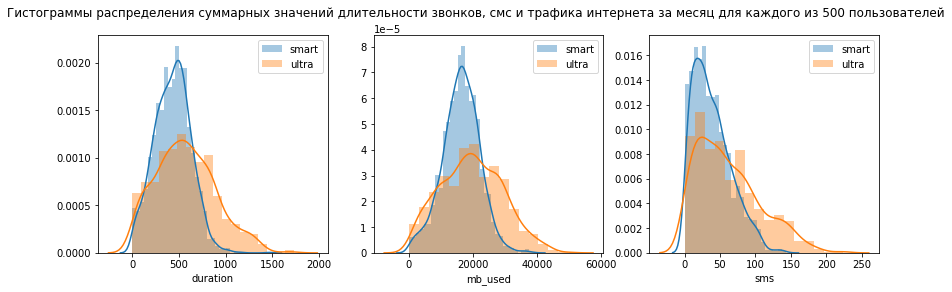

In [40]:
grouped_datas_hist(users_income, 'tariff')

Посмотрим на основные меры центральной тенденции методом describe:

In [41]:
users_income.groupby('tariff')['duration', 'sms', 'mb_used'].describe()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


duration                                                            \
          count        mean         std  min    25%    50%    75%     max   
tariff                                                                      
smart    1915.0  432.637598  192.218259  1.0  295.0  440.0  561.5  1471.0   
ultra     752.0  571.845745  319.835552  1.0  341.0  551.5  779.0  1727.0   

           sms                                                     mb_used  \
         count       mean        std  min   25%   50%   75%    max   count   
tariff                                                                       
smart   1915.0  38.767102  26.810513  1.0  17.0  34.0  55.0  143.0  1915.0   
ultra    752.0  61.640957  44.816850  1.0  25.0  53.0  89.0  224.0   752.0   

                                                                            
                mean          std  min      25%      50%      75%      max  
tariff                                                                      
smart   16274.106527  5802.252195  1.0  12646.5  16495.0  20079.5  38627.0  
ultra   19616.398936  9638.915882  1.0  11917.5  19465.0  26857.0  49793.0

Стоит отметить, что в нашей выборке в 2,5 раза больше данных по тарифу "smart", чем по тарифу "ultra". Из таблицы видно, что для длительности разговоров в месяц среднее и медиана близки по значениям и приблизительно в 2 раза превышают стандартное отклонение, данное распределение характеризуется не большим разбросом данных. Та же ситуация наблюдается для потраченного трафика. Отличную ситуацию мы наблюдаем для количества отправленных в месяц смс. Здесь стандартное отклонение составляет приблизительно 70% для тарифа "smart" и 73% от среднего для тарифа 73% для тарифа "ultra". 

Если проводить сравнительный анализ двух тарифов, то получим следующее:

- пользователи тарифа ultra разговаривают в среднем в 1.32 раза дольше, чем пользователи тарифа smart
- в среднем они отправляют в 1.6 раз больше смс
- их трафик в среднем превышает трафик пользователей тарифа smart в 1.2 раза

Таким образом можно сделать вывод, что пользователи более дорогого тарифа ultra гораздо активнее пользуются всеми услугами мобильного оператора.

Проанализируем данные на наличие нестандартной активности пользователей с помошью метода <a name="cell">box plot</a>:

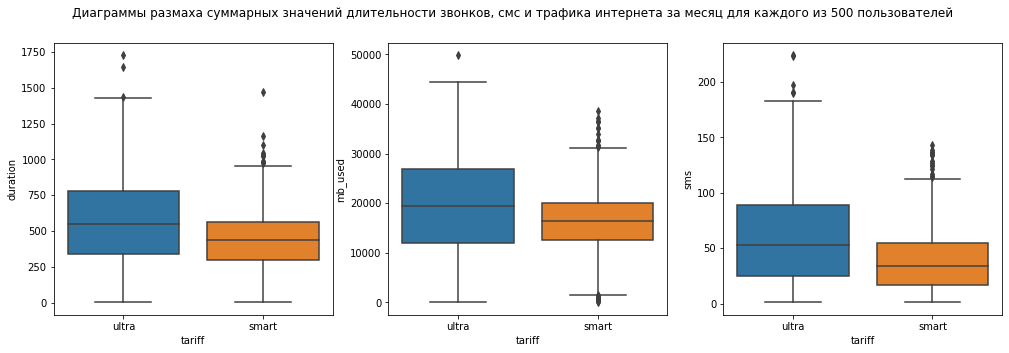

In [42]:
important_parameters = ['duration', 'mb_used', 'sms']
fig, axs = plt.subplots(1,3,figsize=(17,5))
fig.suptitle("Диаграммы размаха суммарных значений длительности звонков, смс и трафика интернета за месяц для каждого из 500 пользователей")
        
for i, important_parameter in enumerate(important_parameters):
    sns.boxplot(data=users_income,y=important_parameter,x="tariff", ax=axs[i])
plt.show()

По диаграммам размаха мы видим графически, что максимальные значения и медианы всех параметров для обоих тарифов отличаются, причём всегда в меньшую сторону для тарифа smart. 

Мы видим небольшое количество точек за пределами усов. Поскольку выбросы могут повлиять на проверку гипотез, нужно очистить от них наши данные. Напишем для этого функцию:

In [43]:
def data_cleaning(data, parametrs):
    """
    Функция принимает датафрейм и название столбца, по которому делается группировка. 
    Нужно устранить выбросы в столбцах из списка important_parameters.
    Для каждого такого столбца функция строит box plot и получает список 
    вида (q1, left_whisker), (q3, right_whisker), 
    где q1 и q3 - первая и третья квартиль,
    right_whisker - внешняя граница правого (на нашей диаграмме верхнего) уса,
    left_whisker - внешняя граница левого (на нашей диаграмме нижнего) уса.
    Далее создаётся новый датафрейм, в который входят только те строки, 
    значения которых в нашем контрольном столбце лежат внутри усов.
    
    """
    
    datas = []
    important_parameters = ['duration', 'mb_used', 'sms']
    
    for column_value, column_slice in data.groupby(parametrs):
        for important_parameter in important_parameters:
            B = plt.boxplot(column_slice[important_parameter])
            wiskers_scope = [item.get_ydata() for item in B['whiskers']] # получаем список вида 
        # (q1, left_whisker), (q3, right_whisker), где q1 и q3 - первая и третья квартиль
            right_whisker = wiskers_scope[1][1]
            left_whisker = wiskers_scope[0][1]
            column_slice = (column_slice[(column_slice[important_parameter] >= left_whisker) & 
                             (column_slice[important_parameter] <= right_whisker)]
                   )
            column_slice[parametrs] = column_value
        datas.append(column_slice)
    return pd.concat(datas)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,user_id,month,calls,duration,mb_used,sms,tariff,income
8,1002,6,15,118,10878,4,smart,550
9,1002,7,26,219,17615,11,smart,991
10,1002,8,42,294,20357,13,smart,1526
11,1002,9,36,217,16724,4,smart,817
12,1002,10,33,221,13913,10,smart,550
...,...,...,...,...,...,...,...,...
2639,1495,8,17,96,2616,13,ultra,1950
2640,1495,9,112,830,33107,82,ultra,2300
2641,1495,10,152,1056,29399,82,ultra,1950
2642,1495,11,129,971,38973,79,ultra,3159


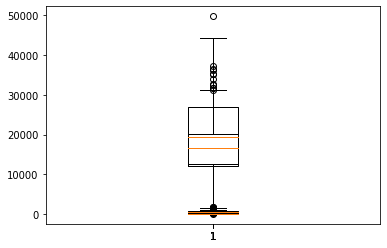

In [44]:
users_income_clean = data_cleaning(users_income, 'tariff')
users_income_clean

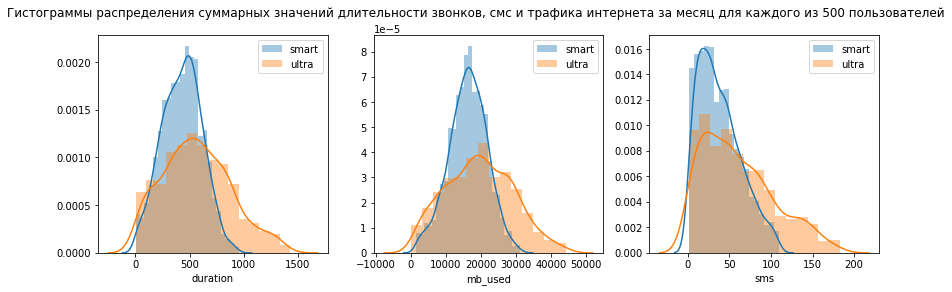

In [45]:
grouped_datas_hist(users_income_clean, 'tariff')

Действительно, "хвосты" гистограмм стали более короткими. Проверим при помощи критерия <a name="shapiro">Шапиро-Уилка</a>, являются ли данные распределения нормальными, уровень статистической значимости выберем 0.05:

In [46]:
def is_distribution_normal(data, parametrs, tests):
    """
    Функция берёт в качестве аргумента датасет, столбец, по которому нужно произвести группировку parametrs
    и столбец с измерениями tests. После проведения группировки, функция проверяет, распределены ли измерения нормально.
    Нулевая гипотеза: измерения распределены нормально.
    Альтернативная гипотеза: распределение измерений в столбце отлично от нормального.
    Опровержение гипотезы происходит на основании теста Шапиро-Уилка с уровнем статистической значимости 
    alpha = 0.05.
    """
    alpha = 0.05
    from scipy.stats import shapiro
    for column_value, column_slice in data.groupby(parametrs):
        print('Проверка на нормальность распределения значений', tests, 'для тарифа', column_value)
        results = shapiro(column_slice[tests])[1]
        print('    p-value =', results)
        if (results < alpha):
            print("    отвергаем нулевую гипотезу, распределение не соответствует нормальному.", end='\n')
        else:
            print("Не получилось отвергнуть нулевую гипотезу о соответствии распределения нормальному.", end='\n')
        print()
        

In [47]:
is_distribution_normal(users_income_clean, 'tariff', 'duration')

Проверка на нормальность распределения значений duration для тарифа smart
    p-value = 1.7749482140061446e-05
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.

Проверка на нормальность распределения значений duration для тарифа ultra
    p-value = 1.0013866358349333e-07
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.



In [48]:
is_distribution_normal(users_income_clean, 'tariff', 'mb_used')

Проверка на нормальность распределения значений mb_used для тарифа smart
    p-value = 0.00015122705372050405
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.

Проверка на нормальность распределения значений mb_used для тарифа ultra
    p-value = 1.390586476190947e-05
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.



In [49]:
is_distribution_normal(users_income_clean, 'tariff', 'sms')

Проверка на нормальность распределения значений sms для тарифа smart
    p-value = 7.494428569898954e-25
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.

Проверка на нормальность распределения значений sms для тарифа ultra
    p-value = 1.5866611903544693e-16
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.



Подсчитаем для обоих тарифов среднее значание, дисперсию и стандартное отклонение, и запишем их в датафрейм tarifs_statistics:

In [50]:
tarifs_statistics = (users_income_clean.pivot_table(index=['tariff'], 
                            aggfunc={'duration': ['mean', lambda x: np.var(x), lambda x: np.std(x, ddof=1)], 
                                     'mb_used': ['mean', lambda x: np.var(x), lambda x: np.std(x, ddof=1)],
                                     'sms': ['mean', lambda x: np.var(x), lambda x: np.std(x, ddof=1)], 
                                     'income': ['mean', lambda x: np.var(x), lambda x: np.std(x, ddof=1)]}).
                     reset_index()
)
tarifs_statistics.columns = (['tariff', 'duration_var', 'duration_std', 'duration_mean', 
                              'mb_var', 'mb_std', 'mb_mean', 
                              'sms_var', 'sms_std', 'sms_mean',
                              'income_var', 'income_std', 'income_mean']
                            )
tarifs_statistics

,tariff,duration_var,duration_std,duration_mean,mb_var,mb_std,mb_mean,sms_var,sms_std,sms_mean,income_var,income_std,income_mean
0,smart,33567.821067,183.264503,429.910753,525708.398304,725.25250,1218.609140,2.973799e+07,5454.721814,16252.762903,647.526039,25.453376,38.229032
1,ultra,97816.125282,312.966377,566.559892,85872.113584,293.23684,2034.242261,9.077189e+07,9533.846438,19536.234186,1870.130666,43.274138,60.559892


Для наглядности все значения в таблице <a name="tarifs_statistics">tarifs_statistics</a> можно округлить до целых:

In [51]:
tarifs_statistics = tarifs_statistics.round(0)
tarifs_statistics

,tariff,duration_var,duration_std,duration_mean,mb_var,mb_std,mb_mean,sms_var,sms_std,sms_mean,income_var,income_std,income_mean
0,smart,33568.0,183.0,430.0,525708.0,725.0,1219.0,29737993.0,5455.0,16253.0,648.0,25.0,38.0
1,ultra,97816.0,313.0,567.0,85872.0,293.0,2034.0,90771894.0,9534.0,19536.0,1870.0,43.0,61.0


## Шаг 3. Выводы

Был проведён анализ поведения клиентов тарифов smart и ultra. По построенным гистограммам для месячной активности абонентов (продолжительности звонков, отправленных смс и потраченного трафика) можно сказать, что все распределения унимодальные, распределения трафика для обоих тарифов симметричные. Распределения отправленных смс и звонков можно характеризовать как ассиметричные: у распределения длительности звонков больше левое плечо, а отправленных смс - правое. Была произведена проверка гипотезы, что длительность звонков, число смс и трафик для каждого тарифа распределены нормально. Для всех шести случаев данная гипотеза была отклонена.

В среднем в месяц клиенты тарифа smart разговаривают по телефону 430 минут (стандартное отклонение составляет 183 минуты), отправляют 38 смс (стандартное отклонение 25 смс) и используют 16253 мб трафика (стандартное отклонение 5455 мб). Для тарифа ultra эти значения составляют 567 минут (стандартное отклонение 313), 61 смс (стандартное отклонение 43 смс) и 19536 мб (стандартное отклонение 9534 мб). Таким образом, пользователи разных тарифов используют услуги в разном объёме, а именно, абоненты тарифа ultra являются более активными пользователями услуг сотового оператора. Исходя также из заметных различий диаграмм разброса <a href="#cell">box plot</a> для услуг по двум тарифам, можно выдвинуть гипотезу о том, что и средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Проверке этой гипотезы посвещён следующий шаг.

## Шаг 4. Проверка гипотез

### Шаг 4.1 Проверка гипотезы об отличии/равенстве выручки пользователей тарифов smart и ultra.

В данном шаге наша первая задача является - установить для генеральной совокупности всех пользователей компании «Мегалайн», одинакова ли выручка для разных тарифов, имея данные по выборке из 500 пользователей. Возьмём в качестве **нулевой гипотезы** следующее утверждение: **"выручка пользователей тарифов smart и ultra одинакова". Альтернативная гипотеза: "выручки пользователей тарифов smart и ultra различаются".** Мы берём утвердительную формулировку для нулевой гипотезы, как это и принято в статистическом анализе. Для проверки гипотезы будем использовать тест Т-Стьюдента. Предварительная гипотеза отвергается, если значение p-value < alpha, где alpha - критический уровень статистической значимости. Зададим для нашего эксперимента alpha = 0.05.

Основные требования для проведения теста Стьюдента: 
1. Дисперсия двух групп приблизительно одинакова.
2. Распределения являются нормальными.

Даже если распределение не нормальное, но в нашей выборке больше 30 измерений, то можно использовать тест Стьюдента.
Для проверки первого требования возьмём критерий Левене. Математический аппарат для проверки критерия есть в пакете scipy.stats.

In [52]:
from scipy.stats import levene

In [53]:
x1 = users_income_clean.query('tariff == "smart"')['income'] # месячная выручка пользователей тарифа smart
x2 = users_income_clean.query('tariff == "ultra"')['income'] # месячная выручка пользователей тарифа ultra

In [54]:
levene(x1, x2)

LeveneResult(statistic=590.5673025696954, pvalue=9.835139006486476e-118)

Получили pvalue < alpha (задаём такой же уровень значимости = 0.05). Исходя из теста Левене, мы отвергаем гипотезу о том, что дисперсии двух групп пользователей приблизительно одинаковы. Т.е. **дисперсии двух групп пользователей тарифов smart и ultra различны.**

Теперь проверим, являются ли распределения месячной выручки клиентов нормальными. Для этого используем снова тест <a href="#shapiro">Шапиро-Уилка</a>:

In [55]:
is_distribution_normal(users_income_clean, 'tariff', 'income')

Проверка на нормальность распределения значений income для тарифа smart
    p-value = 2.9042942028801577e-38
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.

Проверка на нормальность распределения значений income для тарифа ultra
    p-value = 1.401298464324817e-45
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.



Таким образом, **значения доходов, полученных от клиентов в месяц, не принадлежат нормальному распределению**. В таком случае, для проверки нашей гипотезы, о том, что выручка пользователей тарифов smart и ultra одинакова, корректнее использовать непераметрический критерий Манна Уити:

In [56]:
from scipy.stats import mannwhitneyu

In [57]:
mannwhitneyu(x1, x2)

MannwhitneyuResult(statistic=218381.5, pvalue=8.967212039352124e-168)

Поскольку мы получили, что pvalue < alpha (задаём такой же уровень значимости = 0.05), то **мы отвергаем гипотезу о том, что выручка пользователей тарифов smart и ultra одинакова**. 

Из таблицы <a href="#tarifs_statistics">tarifs_statistics</a> мы знаем, что среднее значение дохода от пользователей тарифа ultra превышает тот же показатель пользователей smart приблизительно в 1.6 раза.

In [72]:
users_income_clean.groupby('tariff')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
tariff,,,,,,,,
smart,1860.0,1218.609140,725.25250,550.0,566.5,977.0,1659.0,4355.0
ultra,743.0,2034.242261,293.23684,1950.0,1950.0,1950.0,1950.0,3946.0


### Шаг 4.2 Проверка гипотезы об отличии/равенстве выручки пользователей из Москвы и из других регионов.

Сформулируем для начала нулевую и альтернативную гипотезы:
- Нулевая гипотеза: **"доход от пользователей, проживающих в Москве, и пользователей из регионов равны"**.
- Альтернативная гипотеза: **"доход от пользователей, проживающих в Москве, и пользователей из регионов различаются"**.

На данном этапе разумным представляется оценивать распределения, в которых каждое измерение - это средний доход компании от каждого конкретного пользователя в месяц. Для этого нужно сформировать таблицу, в которой каждому user_id будет соответствовать его средний месячный счёт за услуги. Кроме того, нам нужны данные о городе проживания пользователя из таблицы users. Затем мы сформируем две выборки по городу проживания.

In [58]:
users_costs_per_month = users_income_clean.groupby('user_id').agg({'income': ['mean']}).reset_index()
users_costs_per_month.columns = ['user_id', 'income_per_month']
users_costs_per_month

,user_id,income_per_month
0,1000,1950.000000
1,1002,959.428571
2,1003,1950.000000
3,1004,1950.000000
4,1005,862.000000
...,...,...
412,1495,2261.800000
413,1496,2316.000000
414,1497,912.666667
415,1498,1584.750000


В нашей таблице 417 пользователей. Теперь добавим город из таблицы users и произведём группировку по признаку, является ли городом проживания Москва.

In [59]:
users_cut_2 = users[['user_id', 'city']]
users_costs_per_month = pd.merge(users_costs_per_month, users_cut_2, on = ['user_id'])
users_costs_per_month.head()

,user_id,income_per_month,city
0,1000,1950.000000,Краснодар
1,1002,959.428571,Стерлитамак
2,1003,1950.000000,Москва
3,1004,1950.000000,Новокузнецк
4,1005,862.000000,Набережные Челны


In [60]:
y1 = users_costs_per_month.query('city == "Москва"')['income_per_month'] # месячная выручка пользователей тарифа smart
y2 = users_costs_per_month.query('city != "Москва"')['income_per_month'] # месячная выручка пользователей тарифа ultra

После того, как сформированы выборки, проверим, равны ли дисперсии двух выборок у1 и у2:

In [61]:
levene(y1, y2)

LeveneResult(statistic=0.8479355315862115, pvalue=0.35767198926903976)

Исходя из теста Левене, у нас не получилось отвергнуть нулевую гипотезу о том, что дисперсия доходов от пользователей из Москвы и дисперсия доходов от всех остальных пользователей приблизительно одинаковы. Проверим, сколько пользователей проживает в Москве:

In [62]:
len(y1)

82

In [63]:
len(y2)

335

Таким образом, у нас не получилось отвергнуть гипотезу о равенстве дисперсий двух выборок, и число измерений в каждой выборке больше 30. Это означает, что мы можем применить критерий Стьюдента.

In [64]:
from scipy.stats import ttest_ind

In [65]:
ttest_ind(y1, y2, equal_var=True)

Ttest_indResult(statistic=-0.01140960574417514, pvalue=0.9909021320084023)

## Шаг 4. Выводы

Нами был проведён статистический анализ с целью проверки двух нулевых гипотез: 
1. **Выручка пользователей тарифов smart и ultra одинакова**
1. **Доход от пользователей, проживающих в Москве, и пользователей из регионов равны**

На первом шага анализа проводилась проверка приблизительного равенства дисперсий двух выборок с помощью теста Левене.

Две выборки прользователей тарифов smart и ultra характеризуются различными дисперсиями и не соответствуют нормальному распределению, что подтвердил тест Шапиро Вилка. Поэтому для подтверждения/опровержения первой гипотезы был использован непераметрический критерий Манна Уити. В результате теста нулевая гипотеза была опровергнута, т.е. **выручки пользователей тарифов smart и ultra различаются**.

В случае двух выборок пользователей из Москвы и других регионов, их дисперсии, по всей видимости, близки по значениям, поскольку на основании тесте Левене не удалось опровергнуть гипотезу о равенстве дисперсий. Исходя из того, что число измерений в обоих выборках превышает 30, можно использовать для проверки гипотез тест Стьюдента, что и было сделано. В результате нам не удалось отвергнуть нулевую гипотезу о том, что **доход от пользователей, проживающих в Москве, и пользователей из регионов равны**. 

Во всех тестах уровень статистической значимости alpha был выбран равным 0.05.

# Общие выводы

Целью данного анализа было сравнение двух тарифов на предмет большей прибыльности. Два тарифных плана «Смарт» и «Ультра» сравнивались на небольшой выборке из 500 абонентов компании «Мегалайн» — федерального оператора сотовой связи, все данные предоставлены за 2018 год. Благодаря помесячной компановке данных для каждого пользователся, удалось расширить выборку до 2667 измерений. Данные были проанализированы на предмет наличия выбросов и очищенны от них. В итоговом анализе фигурирует 2603 измерения, причём данных по тарифу "smart" в 2,5 раза больше, чем по тарифу ultra. 

Для каждого пользователя были произведены следующие количественные оценки: количество сделанных звонков и израсходованных минут разговора по месяцам; количество отправленных сообщений по месяцам; объем израсходованного интернет-трафика по месяцам; помесячная выручка компании с каждого пользователя. 

В среднем в месяц клиенты тарифа smart разговаривают по телефону 430 минут (стандартное отклонение составляет 183 минуты), отправляют 38 смс (стандартное отклонение 25 смс) и используют 16253 мб трафика (стандартное отклонение 5455 мб). Для тарифа ultra эти значения составляют 567 минут (стандартное отклонение 313), 61 смс (стандартное отклонение 43 смс) и 19536 мб (стандартное отклонение 9534 мб).

Если проводить сравнительный анализ двух тарифов, то получим следующее:

- пользователи тарифа ultra разговаривают в среднем в 1.32 раза дольше, чем пользователи тарифа smart
- в среднем они отправляют в 1.6 раз больше смс
- их трафик в среднем превышает трафик пользователей тарифа smart в 1.2 раза.

Таким образом, пользователи разных тарифов используют услуги в разном объёме, а именно, абоненты тарифа ultra являются более активными пользователями услуг сотового оператора. Исходя из этого нужно было уточнить, приносят ли пользователи тарифов ultra и smart одинаковый доход компании. Мы сформулировали нулевую и альтернативную гипотезу следующим образом: 
1. Нулевая гипотеза: "выручка пользователей тарифов smart и ultra одинакова". 
1. Альтернативная гипотеза: "выручки пользователей тарифов smart и ultra различаются"

Уровень статистической значимости всех тестов alpha был задан на уровне = 0.05.

Последующий статистический анализ основывался на непераметрическом критерии Манна Уити (поскольку в среднем дисперсии двух выборок различны, а сами выборки не отвечают нормальному распределению). В результате теста нулевая гипотеза была опровергнута, т.е. **выручки пользователей тарифов smart и ultra различаются**. Более выгодным тарифом для компании «Мегалайн» является тариф ultra, поскольку один абонент тарифа ultra в средням приносят в 1.7 раз больший месячный доход, чем абонент тарифа smart.  **Таким образом, для "Мегалайн" выгоднее увеличить бюджет рекламной компании тарифа ultra**.

Второй задачей статистического анализа было выявление более прибыльной целевой аудитории для рекламного бюджета. Для этого были выдвинуты следующие гипотезы:

Нулевая гипотеза: "доход от пользователей, проживающих в Москве, и пользователей из регионов равны".
Альтернативная гипотеза: "доход от пользователей, проживающих в Москве, и пользователей из регионов различаются".

По результатам теста Стьюдента с уровнем статистической значимости alpha = 0.05 нам не удалось опровергнуть нулевую гипотезу, т.е. **доход от пользователей, проживающих в Москве, и пользователей из регионов равны. Таким образом реклама должна быть нацелена в равной степени на жителей Москвы и других регионов**.
